In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree, datasets, metrics, model_selection

data = datasets.load_iris()

x = data.data
y = data.target

print(x.shape, y.shape)

(150, 4) (150,)


In [ ]:
#split the data into train & test
r = 0.4
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(x, y, test_size=r, random_state=5)

#creating the decision tree model
tree_model = tree.DecisionTreeClassifier(criterion='entropy')

#fitting the model
tree_model.fit(xtrain, ytrain)

#training the model
tree_model.fit(xtrain, ytrain)

#predicting the train data for training accuracy
ypredTrain = tree_model.predict(xtrain)

#predicting the test data for testing accuracy
ypredTest = tree_model.predict(xtest)

#calculating the accuracy of the trainig & testing model
accTrain = metrics.accuracy_score(ypredTrain, ytrain)
accTest = metrics.accuracy_score(ypredTest, ytest)

#printing the accuracy
print("Training Accuracy is: ", accTrain)
print("Testing Accuracy is: ", accTest)

Training Accuracy is:  1.0
Testing Accuracy is:  0.95


In [ ]:
tree_model.feature_importances_ #this attribute is holding the values
# for features on the basis of their importance
# highest valued feature is the most important

array([0.01931919, 0.03616553, 0.00972536, 0.93478993])

In [ ]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

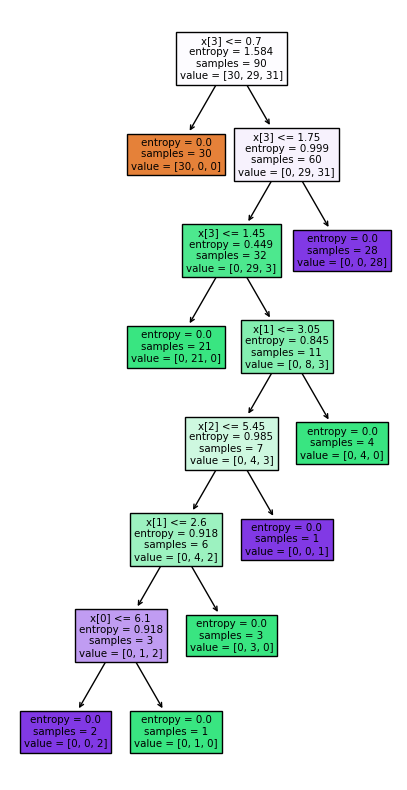

In [ ]:
plt.figure(1,(5,10))
tree.plot_tree(tree_model, filled=True)
plt.show()

**DIABETES.csv**

(768, 9)
(150, 4) (768,)
Training Accuracy is:  0.8584729981378026
Testing Accuracy is:  0.7748917748917749 



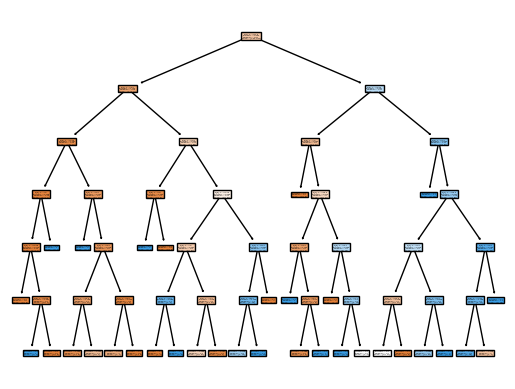

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree, datasets, metrics, model_selection
import pandas as pd

data = pd.read_csv("/content/diabetes.csv")
print(data.shape)
data.head()

# X will be holding all the feature columns
X = data.drop("Outcome", axis=1, inplace=False)

# Y will be holding all the label columns
y = data['Outcome']

print(x.shape, y.shape)

#split the data into train & test
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(X, y, test_size=0.3, random_state=4)

#creating the decision tree model
tree_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=6)

#fitting the model
tree_model.fit(xtrain, ytrain)

#training the model
tree_model.fit(xtrain, ytrain)

#predicting the train data for training accuracy
ypredTrain = tree_model.predict(xtrain)

#predicting the test data for testing accuracy
ypredTest = tree_model.predict(xtest)

#calculating the accuracy of the trainig & testing model
accTrain = metrics.accuracy_score(ypredTrain, ytrain)
accTest = metrics.accuracy_score(ypredTest, ytest)

#printing the accuracy
print("Training Accuracy is: ", accTrain)
print("Testing Accuracy is: ", accTest, "\n")

plt.figure(1)
tree.plot_tree(tree_model, filled=True)
plt.show()

**ORL - FACE**

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
!unzip "/content/drive/MyDrive/Colab Notebooks/orl_face.zip" -d "/content/drive/MyDrive/Colab Notebooks"

Archive:  /content/drive/MyDrive/Colab Notebooks/orl_face.zip
   creating: /content/drive/MyDrive/Colab Notebooks/orl_face/
  inflating: /content/drive/MyDrive/Colab Notebooks/orl_face/.DS_Store  
   creating: /content/drive/MyDrive/Colab Notebooks/__MACOSX/
   creating: /content/drive/MyDrive/Colab Notebooks/__MACOSX/orl_face/
  inflating: /content/drive/MyDrive/Colab Notebooks/__MACOSX/orl_face/._.DS_Store  
   creating: /content/drive/MyDrive/Colab Notebooks/orl_face/u1/
  inflating: /content/drive/MyDrive/Colab Notebooks/orl_face/u1/1.png  
   creating: /content/drive/MyDrive/Colab Notebooks/__MACOSX/orl_face/u1/
  inflating: /content/drive/MyDrive/Colab Notebooks/__MACOSX/orl_face/u1/._1.png  
  inflating: /content/drive/MyDrive/Colab Notebooks/orl_face/u1/10.png  
  inflating: /content/drive/MyDrive/Colab Notebooks/orl_face/u1/2.png  
  inflating: /content/drive/MyDrive/Colab Notebooks/orl_face/u1/3.png  
  inflating: /content/drive/MyDrive/Colab Notebooks/orl_face/u1/4.png  
  i

<class 'numpy.ndarray'>
(112, 92)


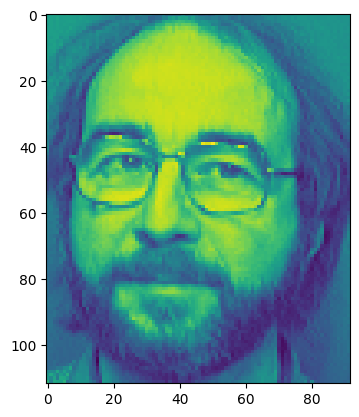

In [ ]:
import matplotlib.image as mimg
import matplotlib.pyplot as plt

#access any single image
user_name = 28
samp_no = 3

path = "/content/drive/MyDrive/Colab Notebooks/orl_face/u%d/%d.png"%(user_name, samp_no)

#read the img
img = mimg.imread(path)

#plot the img
img = mimg.imread(path)
print(type(img))
print(img.shape)

#display the img
plt.imshow(img)

<class 'numpy.ndarray'>
(112, 92)


(-0.5, 91.5, 111.5, -0.5)

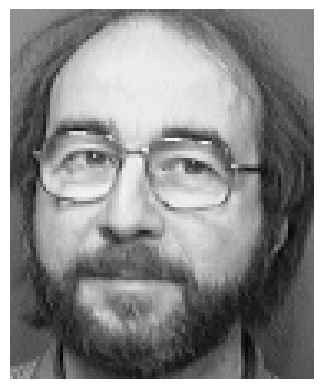

In [ ]:
import matplotlib.image as mimg
import matplotlib.pyplot as plt

#access any single image
user_name = 28
samp_no = 3

path = "/content/drive/MyDrive/Colab Notebooks/orl_face/u%d/%d.png"%(user_name, samp_no)

#read the img
img = mimg.imread(path)

#plot the img
img = mimg.imread(path)
print(type(img))
print(img.shape)

#display the img
plt.imshow(img, cmap='gray')
plt.axis('off')

In [ ]:
# convert the 2D-data of image into 1-D features
feat = img.reshape(1,-1)# shift all the values of the image
#into the columns in one single row
print(img.shape)
print(feat.shape)
print("range:",img.min(),'-',img.max())

(112, 92)
(1, 10304)
range: 0.015686275 - 0.8509804


In [ ]:
# logic to access all the samples of all the users!

import matplotlib.image as mimg
import matplotlib.pyplot as plt
tot_samples = 400

data = np.zeros((tot_samples,img.shape[0]*img.shape[1]))
label = np.zeros((tot_samples))
images = np.zeros((tot_samples,img.shape[0],img.shape[1]))
indx=-1

for i in range(1,41,1): # to traverse users
  for j in range(1,11,1): # to traverse samples
    indx = indx+1

    # access any single image
    usr_name = i
    samp_no = j
    path = "/content/drive/MyDrive/Colab Notebooks/orl_face/u%d/%d.png"%(usr_name,samp_no)

    # read the image
    im = mimg.imread(path)
    feat = im.reshape(1,-1)
    data[indx,:]=feat
    label[indx]=i
    images[indx,:,:]=im
    print("user num ",i,'samp no',j,'processed...')

user num  1 samp no 1 processed...
user num  1 samp no 2 processed...
user num  1 samp no 3 processed...
user num  1 samp no 4 processed...
user num  1 samp no 5 processed...
user num  1 samp no 6 processed...
user num  1 samp no 7 processed...
user num  1 samp no 8 processed...
user num  1 samp no 9 processed...
user num  1 samp no 10 processed...
user num  2 samp no 1 processed...
user num  2 samp no 2 processed...
user num  2 samp no 3 processed...
user num  2 samp no 4 processed...
user num  2 samp no 5 processed...
user num  2 samp no 6 processed...
user num  2 samp no 7 processed...
user num  2 samp no 8 processed...
user num  2 samp no 9 processed...
user num  2 samp no 10 processed...
user num  3 samp no 1 processed...
user num  3 samp no 2 processed...
user num  3 samp no 3 processed...
user num  3 samp no 4 processed...
user num  3 samp no 5 processed...
user num  3 samp no 6 processed...
user num  3 samp no 7 processed...
user num  3 samp no 8 processed...
user num  3 samp n

(-0.5, 91.5, 111.5, -0.5)

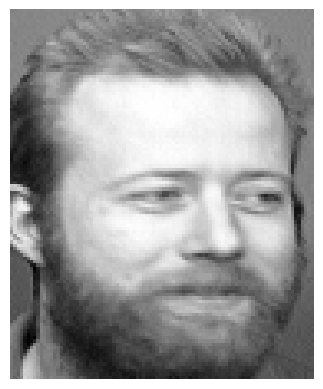

In [ ]:
# display the image
plt.imshow(images[257,:,:],cmap='gray')
plt.axis('off')

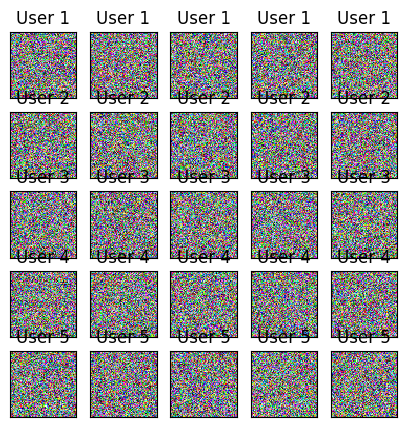

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate 25 random images
images = np.random.randint(low=0, high=255, size=(25, 64, 64, 3), dtype=np.uint8)

# Create a 5x5 grid of subplots
fig, axes = plt.subplots(5, 5, figsize=(5, 5))

# Iterate over the images and plot them
for i, ax in enumerate(axes.flat):
    # Get the current image
    image = images[i]

    # Plot the image
    ax.imshow(image, interpolation='nearest')
    ax.set_xticks([])
    ax.set_yticks([])

    # Get the user number
    user_no = i // 5 + 1

    # Add the user number to the title
    ax.set_title(f'User {user_no}')

# Show the plot
plt.show()

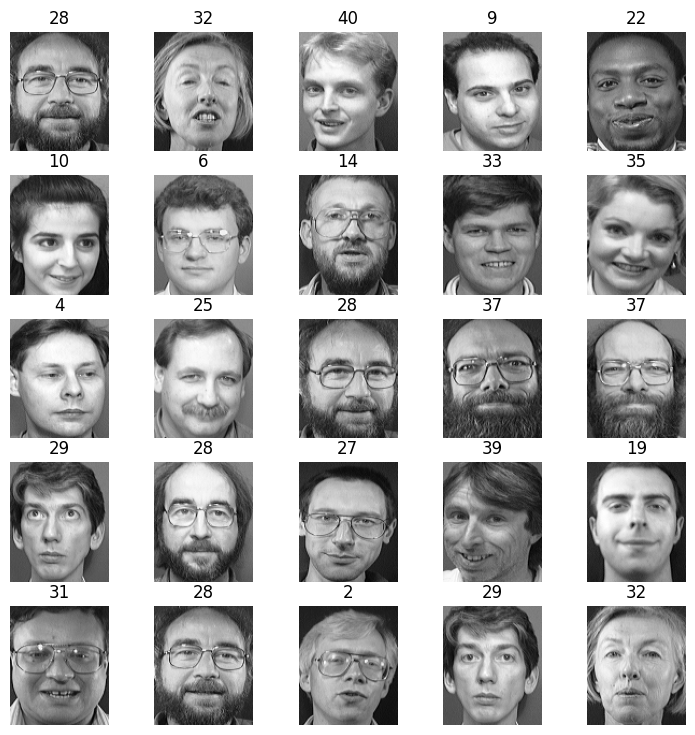

In [ ]:
# 5x5 data frame

ind=0
for i in range(5):
  for j in range(5):
    ind = ind+1
    s = np.random.randint(0,400)
    currIm = images[s,:,:]
    currId = label[s]
    plt.figure(1,figsize=(9,9))
    plt.subplot(5,5,ind)
    plt.imshow(currIm,cmap='gray')
    plt.title(str(int(currId)))
    plt.axis('off')

**SVM**

      poly       rbf    linear
C=1  0.975  0.958333  0.966667
C=2  0.975  0.958333  0.966667
C=3  0.975  0.958333  0.966667


<Axes: >

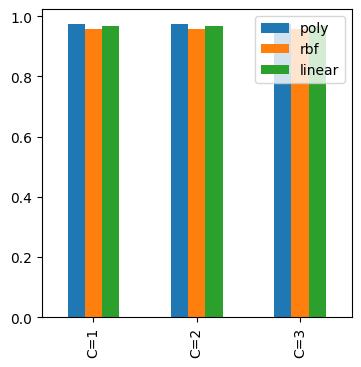

In [ ]:
from sklearn import svm

x = data
y = label

xtrain,xtest,ytrain,ytest = model_selection.train_test_split(x,y,test_size=0.3,random_state=4)

kernel = ["poly", "rbf", "linear"]
Cvalue = [1,2,3]

result = np.zeros((len(kernel),len(Cvalue)))
for i in range(len(kernel)):
  for j in range(len(Cvalue)):
    img_model = svm.SVC(kernel=kernel[i], gamma="scale",C=Cvalue[i])
    img_model = img_model.fit(xtrain,ytrain)
    ypred = img_model.predict(xtest)

    acc = metrics.accuracy_score(ypred,ytest)
    result[i,j]=acc

ResultDF = pd.DataFrame(result,index=kernel,columns=["C=1","C=2","C=3"])
ResultDF = ResultDF.T
print(ResultDF)
ResultDF.plot(kind='bar',figsize=(4,4))

In [ ]:
# Saving the trained model in the drive!

import joblib
from sklearn import svm
img_model = svm.SVC(kernel='linear', gamma="scale",C=1)
img_model = img_model.fit(xtrain,ytrain)
joblib.dump(img_model,'/content/drive/MyDrive/Colab Notebooks/orl_face_trained_model.pkl')

['/content/drive/MyDrive/Colab Notebooks/orl_face_trained_model.pkl']

**TESTING THE SAVED TRAINED MODEL**

Enter the User number: 14
<class 'numpy.ndarray'>
(112, 92)


Text(0.5, 1.0, 'Query Image')

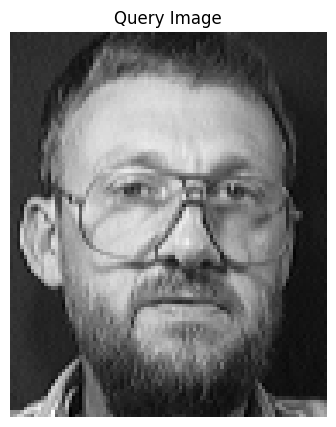

In [ ]:
#load any sample for the dataset
#ask the coder - user id and select any random 1-10 sample number of that user id
#as the query image

import matplotlib.image as mimg
import matplotlib.pyplot as plt
import numpy as np

# load the query image
usrId = int(input("Enter the User number: "))
samp = np.random.randint(8,10) #selcting any random sample number
path = "/content/drive/MyDrive/Colab Notebooks/orl_face/u%d/%d.png"%(usrId,samp)

#read the img
img = mimg.imread(path)

#plot the img
print(type(img))
print(img.shape)

#display the img
plt.figure(1,(5,5))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title("Query Image")

User id predicted is : 40


Text(0.5, 1.0, 'Predicted user')

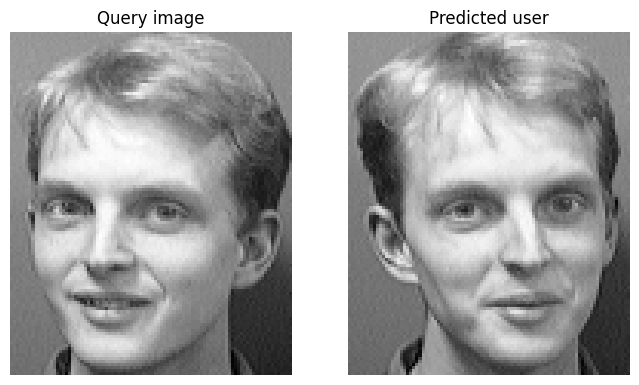

In [ ]:
import joblib
from sklearn import svm ,metrics
# calcualte the features of the query image
feat_query = im.reshape(1,-1)

# model path
path_model = '/content/drive/MyDrive/Colab Notebooks/orl_face_trained_model.pkl'
# load the trained model
face_model = joblib.load(path_model)


# predict the id of the query image
id = face_model.predict(feat_query)
print("User id predicted is :",int(id[0]))


path = "/content/drive/MyDrive/Colab Notebooks/orl_face/u%d/%d.png"%(id[0],1)

im_pred = mimg.imread(path)

plt.figure(1,(8,5))
plt.subplot(1,2,1)
plt.imshow(im,cmap='gray')
plt.axis('off')
plt.title("Query image")

plt.subplot(1,2,2)
plt.imshow(im_pred,cmap='gray')
plt.axis('off')
plt.title("Predicted user")

# MY FACE TRAINING

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.image as mimg
import numpy as np
import matplotlib.pyplot as plt
total_samples = 410
data = np.zeros((total_samples,112*92))
label = np.zeros((total_samples))
images = np.zeros((total_samples,112,92))

index = -1
for i in range(1,42,1):
  for j in range(1,11,1):
    user_id = i
    samp_no = j
    index = index + 1
    path = "/content/drive/MyDrive/Colab Notebooks/orl_face/u%d/%d.png"%(user_id, samp_no)

    im = mimg.imread(path)
    feat = im.reshape(1,-1)
    data[index,:] = feat
    label[index] = i
    images[index,:,:] = im

print(images.shape)

(410, 112, 92)


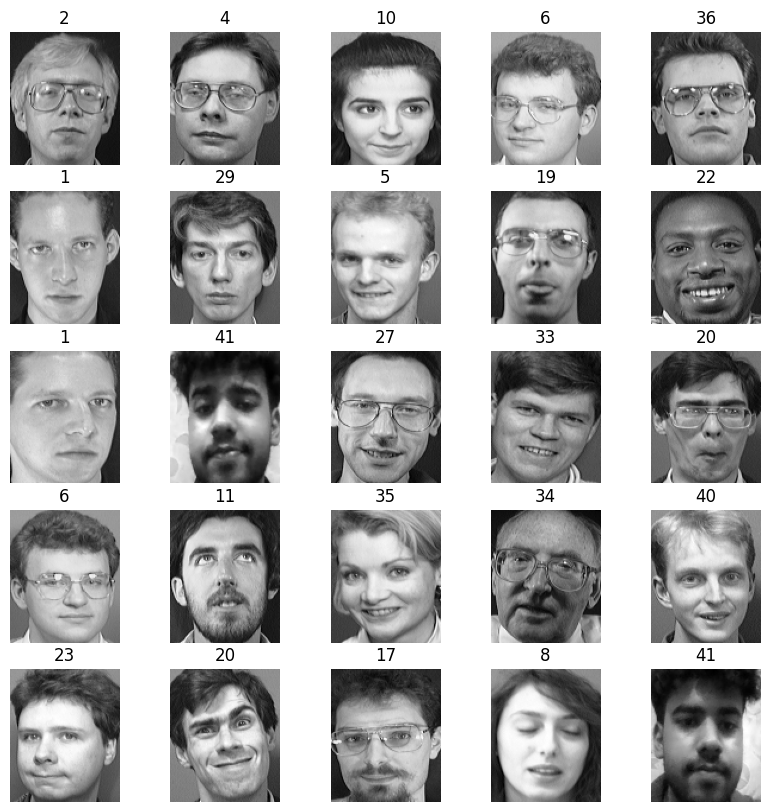

In [ ]:
import numpy as np
# visualise the data images
plt.figure(1,(10,10))
for i in range(5):
  for j in range(5):
    num = np.random.randint(0,410)
    samples_im = images[num,:,:]
    plt.subplot(5,5,(i+j*5)+1)
    plt.imshow(samples_im,cmap='gray')
    plt.title(str(int(label[num])))
    plt.axis('off')

        poly      rbf   linear
C=1  0.97561  0.95122  0.98374
C=2  0.97561  0.95122  0.98374
C=3  0.97561  0.95122  0.98374


<Axes: >

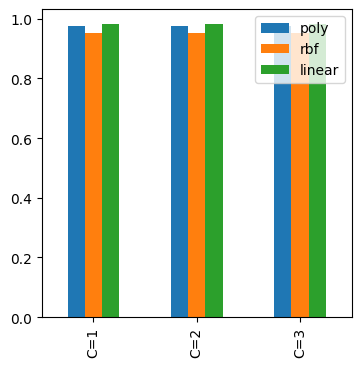

In [ ]:
from sklearn import svm,model_selection,metrics
import numpy as np
import pandas as pd

x = data
y = label

xtrain,xtest,ytrain,ytest = model_selection.train_test_split(x,y,test_size=0.3,random_state=4)

kernel = ["poly", "rbf", "linear"]
Cvalue = [1,2,3]

result = np.zeros((len(kernel),len(Cvalue)))
for i in range(len(kernel)):
  for j in range(len(Cvalue)):
    img_model = svm.SVC(kernel=kernel[i], gamma="scale",C=Cvalue[i])
    img_model = img_model.fit(xtrain,ytrain)
    ypred = img_model.predict(xtest)

    acc = metrics.accuracy_score(ypred,ytest)
    result[i,j]=acc

ResultDF = pd.DataFrame(result,index=kernel,columns=["C=1","C=2","C=3"])
ResultDF = ResultDF.T
print(ResultDF)
ResultDF.plot(kind='bar',figsize=(4,4))

In [ ]:
#Saving our trained model in google drive
#we use joblib to save models

import joblib
from sklearn import svm
img_model = svm.SVC(kernel='linear', gamma="scale",C=1)
img_model = img_model.fit(xtrain,ytrain)
joblib.dump(img_model,'/content/drive/MyDrive/Colab Notebooks/my_orl_face_trained_model.pkl')

['/content/drive/MyDrive/Colab Notebooks/my_orl_face_trained_model.pkl']